#🎯 Objetivo

É muito mais comum que um pesquisador se interesse pela diferença entre médias do que pelos valores específicos das médias em si.

# 🧠 Exemplo

Tomamos como exemplo os dados do estudo de caso "Pesquisa Animal". Neste experimento, os alunos avaliaram (em uma escala de 7 pontos) se achavam que a pesquisa animal estava errada. Os tamanhos amostrais, médias e variâncias são mostrados separadamente para homens e mulheres na Tabela.

In [3]:
from scipy.stats import t
import pandas as pd

In [4]:
df = pd.read_csv(
    'http://onlinestatbook.com/2/case_studies/data/animals.txt',
    sep='\t'
)
df.head()

,GENDER,WRONG,NECESSAR
0,2,3,5
1,2,2,7
2,2,3,5
3,2,5,5
4,2,6,4


In [5]:
df.groupby('GENDER')['WRONG'].agg(['count', 'mean', 'var'])

,count,mean,var
GENDER,,,
1,17,5.352941,2.742647
2,17,3.882353,2.985294


Como você pode ver, as mulheres classificaram a pesquisa com animais como mais equivocada do que os homens.

A diferença amostral entre a média feminina de 5,35 e a média masculina de 3,88 é de 1,47.

No entanto, a diferença de gênero nesta amostra específica não é muito importante. **O que importa é a diferença na população. A diferença nas médias amostrais é usada para estimar a diferença nas médias populacionais.** A precisão da estimativa é revelada por um intervalo de confiança.

# 📐 Fórmula do Intervalo de Confiança para a Diferença de Médias

Para construir um intervalo de confiança, faremos três suposições:

* As duas populações têm a mesma variância. Essa suposição é chamada de suposição de homogeneidade da variância.
* As populações são normalmente distribuídas.
* Cada valor é amostrado independentemente um do outro.

As consequências da violação dessas suposições serão discutidas em uma seção posterior. Por enquanto, basta dizer que violações pequenas a moderadas das suposições 1 e 2 não fazem muita diferença.

Um intervalo de confiança sobre a diferença entre médias é calculado usando a seguinte fórmula:

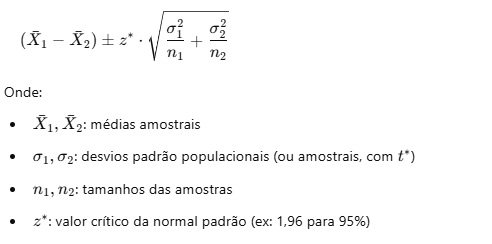

Continuaremos a usar os dados do estudo de caso "Pesquisa Animal" e calcularemos um intervalo de confiança sobre a diferença entre a pontuação média das mulheres e a pontuação média dos homens. Para este cálculo, assumiremos que as variâncias em cada uma das duas populações são iguais.

#📊 Cálculo para caso de grupos com variância e tamanhos iguais

O primeiro passo é calcular a estimativa do erro padrão da diferença entre médias (sM1−M2). Lembre-se da seção relevante no capítulo sobre distribuições amostrais que a fórmula para o erro padrão da diferença de médias na população quando as variâncias e os tamanhos amostrais são iguais é:

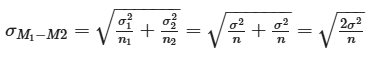

Para estimar essa quantidade, estimamos s2 e usamos essa estimativa no lugar de σ2. Como estamos assumindo que as variâncias da população são as mesmas, estimamos essa variância calculando a média das nossas duas variâncias amostrais. Assim, nossa estimativa de variância é calculada usando a seguinte fórmula:

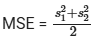

onde MSE é nossa estimativa de σ2. Neste exemplo,

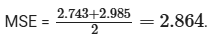

Observe que MSE significa **"erro quadrático médio"** e é o desvio quadrático médio de cada pontuação em relação à média do seu grupo.

In [6]:
mse = df.groupby('GENDER')['WRONG'].var().mean()
mse

np.float64(2.863970588235294)

Como $n$ (o número de pontuações em cada condição) é 17,

$s_{M_1-M2} = \sqrt{\frac{2 MSE}{n}}=\sqrt{\frac{(2)(2,864)}{17}}=0,5805$

In [7]:
n = df.groupby('GENDER')['WRONG'].count().at[1]
s_M = ((2 * mse) / n) ** 0.5
s_M

np.float64(0.5804633634114867)

O próximo passo é encontrar o $t$ a ser usado para o intervalo de confiança ($t_{CL}$). Para calcular $t_{CL}$, precisamos saber os graus de liberdade. Os graus de liberdade são o número de estimativas independentes de variância nas quais o MSE se baseia.

Isso é igual a $(n_1 - 1) + (n_2 - 1)$, onde $n_1$ é o tamanho da amostra do primeiro grupo e $n_2$ é o tamanho da amostra do segundo grupo. Para este exemplo, $n_1 = n_2 = 17$. Quando $n_1 = n_2$, é convencional usar "$n$" para se referir ao tamanho da amostra de cada grupo. Portanto, os graus de liberdade são $16 + 16 = 32$.

In [14]:
deg_free = df.groupby('GENDER')['WRONG'].apply(lambda x: x.count() - 1).sum()
deg_free

np.int64(32)

Usando uma calculadora aou uma tabela t, você pode descobrir que o t para um intervalo de confiança de 95% para 32 df é 2,037.

In [15]:
t_stat = t(deg_free).ppf(.975)
t_stat

np.float64(2.036933343460101)

Agora temos todos os componentes necessários para calcular o intervalo de confiança. Primeiro, sabemos a diferença entre as médias:

$M_1 - M_2 = 5.353 - 3.882 = 1.471$

In [10]:
m = (
    df
    .groupby('GENDER')
    ['WRONG']
    .mean()
    .sort_index(ascending=False)
    .diff()
    .at[1]
)
m

np.float64(1.4705882352941173)

Sabemos que o erro padrão da diferença entre médias é

$s_{M_1-M_2} = 0.5805$

In [8]:
s_M

np.float64(0.5804633634114867)

e que o t para o intervalo de confiança de 95% com 32 df é $t_{CL} = 2.037$

In [16]:
t_stat

np.float64(2.036933343460101)

Portanto, o intervalo de confiança de 95% é

Limite Inferior = $ 1,471 - (2,037) (0,5805) = $ 0,29

Limite Superior = $ 1,471 + (2,037) (0,5805) = $ 2,65

In [17]:
lower_limit = m - t_stat * s_M
upper_limit = m + t_stat * s_M
lower_limit, upper_limit

(np.float64(0.288223055704262), np.float64(2.6529534148839726))

Podemos escrever o intervalo de confiança como:

$0,29 \leq \mu_f - \mu_m \leq 2,65$

onde $\mu_f$ é a média populacional para mulheres e $\mu_m$ é a média populacional para homens. Esta análise fornece evidências de que a média para mulheres é maior do que a média para homens e que a diferença entre as médias na população provavelmente está entre 0,29 e 2,65.

#📊 Cálculo para caso de grupos com diferentes variâncias e tamanhos

* Grupo 1: média = 100, desvio = 15, 𝑛 = 64
* Grupo 2: média = 95, desvio = 20,  𝑛 = 49

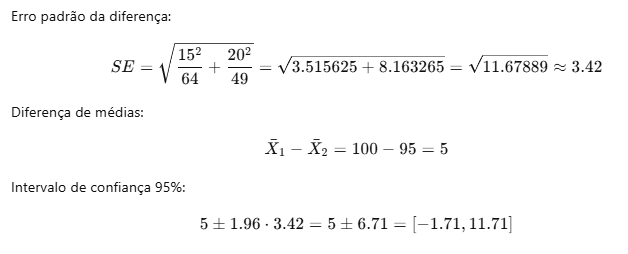

In [18]:
from scipy.stats import norm
import numpy as np

# Parâmetros
x1, x2 = 100, 95
s1, s2 = 15, 20
n1, n2 = 64, 49
z = norm.ppf(0.975)

# Erro padrão
se = np.sqrt((s1**2)/n1 + (s2**2)/n2)

# IC
diff = x1 - x2
ic_inf = diff - z * se
ic_sup = diff + z * se

print(f"IC 95%: [{ic_inf:.2f}, {ic_sup:.2f}]")


IC 95%: [-1.70, 11.70]


Como o intervalo inclui o zero, não há evidência estatística de que as médias são diferentes com 95% de confiança.

Se o zero está dentro desse intervalo, então:
* É plausível que a diferença real entre as médias seja zero.
* Ou seja, pode ser que não haja diferença real — a diferença observada (5, por exemplo) pode ter ocorrido apenas por variação amostral (sorte/azar da amostra).

Isso não significa:
* Que as médias são iguais.
* Que não há diferença nenhuma.
* Que o estudo "deu errado".

Portanto:

Quando o IC inclui o 0, dizemos: “Não há evidência estatística de que as médias dos grupos sejam diferentes ao nível de 95% de confiança.”

Se o IC não incluir 0, dizemos: “Há evidência estatística de que as médias são diferentes com 95% de confiança.”